**GENERAL PROBLEM**

In the context of breast cancer diagnosis, the challenge is to develop an accurate and reliable predictive model that can assist medical professionals in classifying tumors as malignant or benign based on various diagnostic features. The objective is to enhance the diagnostic process, ensuring early detection of malignant tumors and reducing unnecessary interventions for benign cases.





---


# **DATA GATHERING**

This is the part where the dataset will be loaded into the notebook. The source of the dataset is from Kaggle. The dataset used in this project contains essential features related to tumor characteristics. These features are crucial in the diagnosis of breast cancer. Understanding these features and their significance is vital for medical professionals and researchers working in oncology.

In [ ]:
!pip install -U -q PyDrive

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

#Drive link for the data: https://drive.google.com/file/d/1dRni2rXX5cdgckwHQLKreS3QHKnX1A1-/view?usp=sharing
# Authenticate and create the PyDrive client
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

file_id = '1dRni2rXX5cdgckwHQLKreS3QHKnX1A1-'
downloaded = drive.CreateFile({'id': file_id})
downloaded.GetContentFile('data.csv')
df = pd.read_csv('data.csv')


In [ ]:
#df = pd.read_csv("data.csv", sep=",")
df

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


# **CLEANING THE DATA**

In this step, we will verify that all columns have appropriate data types, ensuring consistency and accuracy in our analysis. By confirming the correct data types (such as integer, and floats for ratios and averages), we guarantee meaningful calculations and visualizations.

In [ ]:
#remove the null values in my data set
df.dropna()

df.reset_index()

#Remove duplicated datas in the set
df.drop_duplicates()

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
# Format columns to have 2 decimal places and replace missing values with 'NA'
df.iloc[:,2:33].applymap(lambda x: f'{x:.4f}' if not pd.isnull(x) else 'NA')

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,17.9900,10.3800,122.8000,1001.0000,0.1184,0.2776,0.3001,0.1471,0.2419,0.0787,...,17.3300,184.6000,2019.0000,0.1622,0.6656,0.7119,0.2654,0.4601,0.1189,NA
1,20.5700,17.7700,132.9000,1326.0000,0.0847,0.0786,0.0869,0.0702,0.1812,0.0567,...,23.4100,158.8000,1956.0000,0.1238,0.1866,0.2416,0.1860,0.2750,0.0890,NA
2,19.6900,21.2500,130.0000,1203.0000,0.1096,0.1599,0.1974,0.1279,0.2069,0.0600,...,25.5300,152.5000,1709.0000,0.1444,0.4245,0.4504,0.2430,0.3613,0.0876,NA
3,11.4200,20.3800,77.5800,386.1000,0.1425,0.2839,0.2414,0.1052,0.2597,0.0974,...,26.5000,98.8700,567.7000,0.2098,0.8663,0.6869,0.2575,0.6638,0.1730,NA
4,20.2900,14.3400,135.1000,1297.0000,0.1003,0.1328,0.1980,0.1043,0.1809,0.0588,...,16.6700,152.2000,1575.0000,0.1374,0.2050,0.4000,0.1625,0.2364,0.0768,NA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.5600,22.3900,142.0000,1479.0000,0.1110,0.1159,0.2439,0.1389,0.1726,0.0562,...,26.4000,166.1000,2027.0000,0.1410,0.2113,0.4107,0.2216,0.2060,0.0712,NA
565,20.1300,28.2500,131.2000,1261.0000,0.0978,0.1034,0.1440,0.0979,0.1752,0.0553,...,38.2500,155.0000,1731.0000,0.1166,0.1922,0.3215,0.1628,0.2572,0.0664,NA
566,16.6000,28.0800,108.3000,858.1000,0.0846,0.1023,0.0925,0.0530,0.1590,0.0565,...,34.1200,126.7000,1124.0000,0.1139,0.3094,0.3403,0.1418,0.2218,0.0782,NA
567,20.6000,29.3300,140.1000,1265.0000,0.1178,0.2770,0.3514,0.1520,0.2397,0.0702,...,39.4200,184.6000,1821.0000,0.1650,0.8681,0.9387,0.2650,0.4087,0.1240,NA


In [ ]:
# List of columns to be dropped
columns_to_drop = ['id','radius_se', 'texture_se', 'perimeter_se', 'area_se',
                   'smoothness_se', 'compactness_se', 'concavity_se',
                   'concave points_se', 'symmetry_se', 'fractal_dimension_se',
                   'radius_worst', 'texture_worst', 'perimeter_worst',
                   'area_worst', 'smoothness_worst', 'compactness_worst',
                   'concavity_worst', 'concave points_worst', 'symmetry_worst',
                   'fractal_dimension_worst']

# Drop the specified columns from the DataFrame
df.drop(columns=columns_to_drop, inplace=True)


0    357
1    212
Name: diagnosis, dtype: int64


Concentrating on mean-related features indicates a specific area of interest, possibly aiming to understand the average tumor characteristics. This focused approach enables a deep dive into understanding the central tendencies of the tumor features, providing valuable insights for further analysis and modeling.




---


# **EXPLORATORY DATA ANALYSIS**

**Data Science Questions:**

1. **Model Accuracy and Reliability**
- Can machine learning algorithms accurately classify breast tumors as malignant or benign? What is the most reliable model for this classification task?

2. **Feature Importance and Interpretability**
- Which diagnostic features contribute significantly to the accurate classification of breast tumors? Understanding the importance of these features can aid medical professionals in their decision-making process.

3. **Generalizability and Real-World Applicability**
- How well does the developed model generalize to unseen data, and what are the practical implications of its application in real-world clinical settings? Assessing the model's performance beyond the training dataset is crucial for its practical utility.

In [ ]:
df.describe()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,Unnamed: 32
count,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,569.000000,0.0
mean,14.127292,19.289649,91.969033,654.889104,0.096360,0.104341,0.088799,0.048919,0.181162,0.062798,NaN
std,3.524049,4.301036,24.298981,351.914129,0.014064,0.052813,0.079720,0.038803,0.027414,0.007060,NaN
min,6.981000,9.710000,43.790000,143.500000,0.052630,0.019380,0.000000,0.000000,0.106000,0.049960,NaN
25%,11.700000,16.170000,75.170000,420.300000,0.086370,0.064920,0.029560,0.020310,0.161900,0.057700,NaN
50%,13.370000,18.840000,86.240000,551.100000,0.095870,0.092630,0.061540,0.033500,0.179200,0.061540,NaN
75%,15.780000,21.800000,104.100000,782.700000,0.105300,0.130400,0.130700,0.074000,0.195700,0.066120,NaN
max,28.110000,39.280000,188.500000,2501.000000,0.163400,0.345400,0.426800,0.201200,0.304000,0.097440,NaN


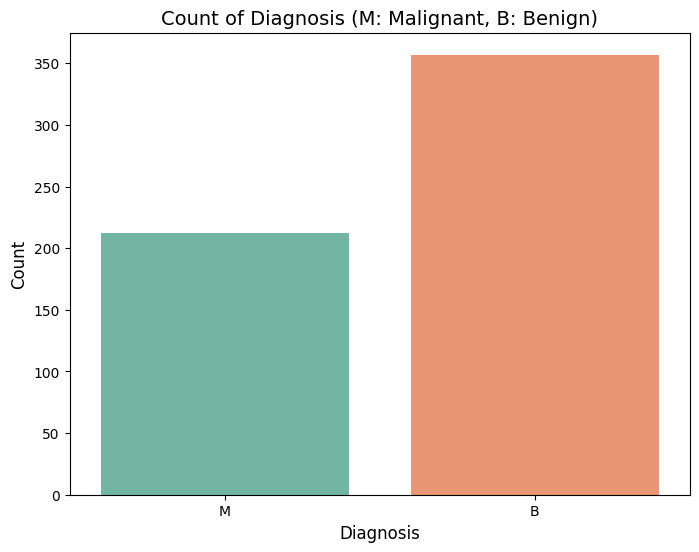

In [ ]:
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='diagnosis', palette='Set2')
plt.title('Count of Diagnosis (M: Malignant, B: Benign)', fontsize=14)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.show()


Here, the ratio is approximately 1:1.67 (M:B). While it's not perfectly balanced, it's not highly skewed either. A good rule of thumb is that a class imbalance becomes a significant concern when the ratio of samples in the minority class to the majority class is much less than 1:10. However, to avoid model bias, SMOTE will be utilized in the modeling phase for enhanced accuracy and fairness.

In [ ]:
from sklearn.preprocessing import LabelEncoder
df['diagnosis']=LabelEncoder().fit_transform(df['diagnosis'])

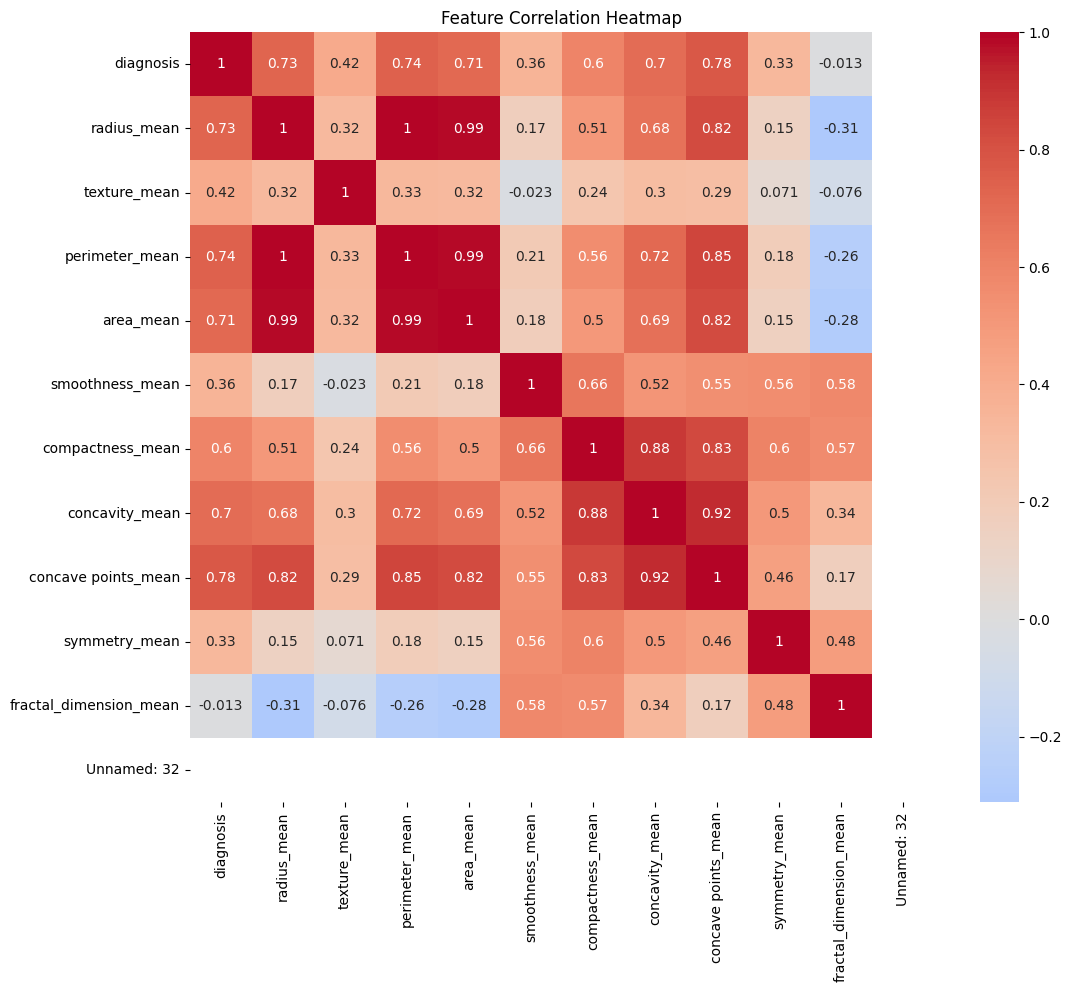

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlation Heatmap')
plt.show()

##Positive Correlations:##
  1. Radius Mean, Perimeter Mean, Area Mean, and Concave Points Mean: These features show strong positive correlations, which is expected since they are related geometrically. Tumors with larger radius tend to have higher perimeter and area values.
  2. Compactness Mean, Concavity Mean, and Concave Points Mean: These features are positively correlated, suggesting that tumors with higher compactness tend to have more concave shapes.

##Negative Correlations:##
  1. Texture Mean and Smoothness Mean: These features exhibit a negative correlation, indicating that tumors with smoother textures tend to have lower texture mean values.

##Weak Correlations:
  1. Some features show weak correlations (close to 0) with each other, indicating a lack of linear relationship.

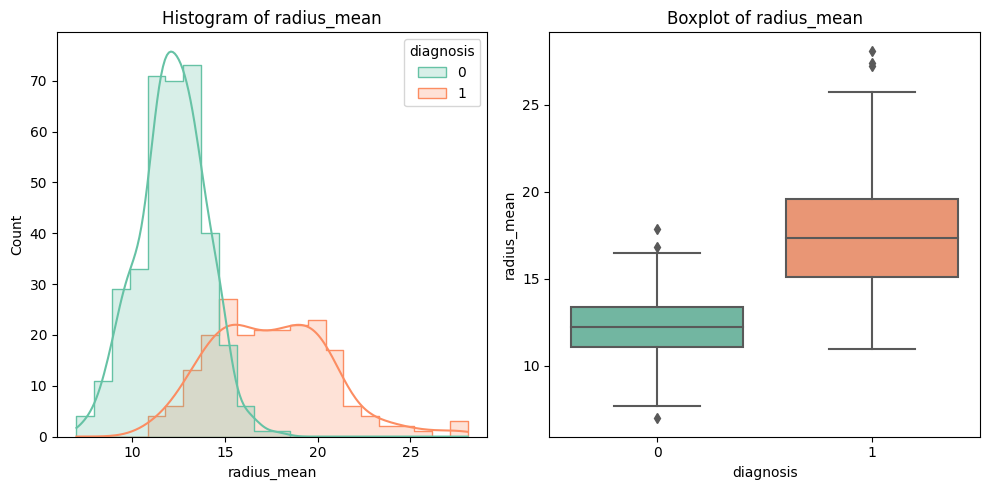

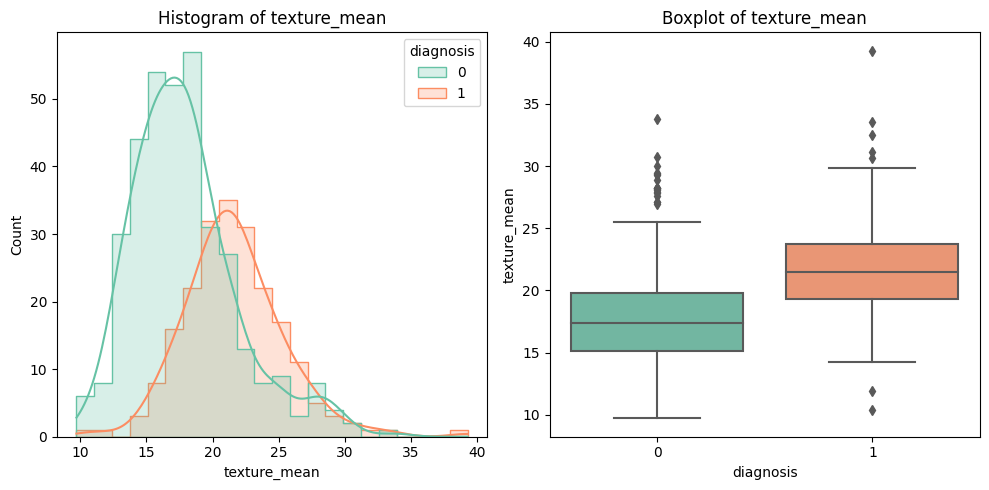

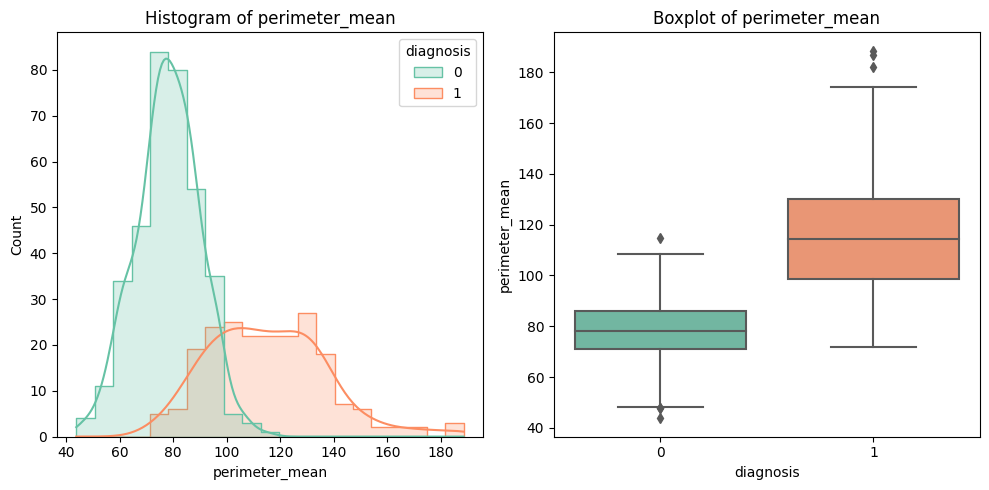

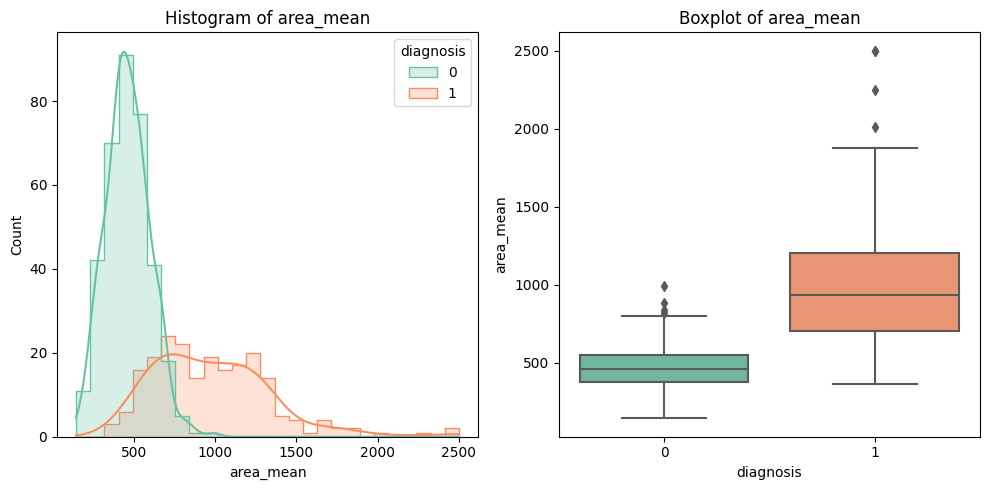

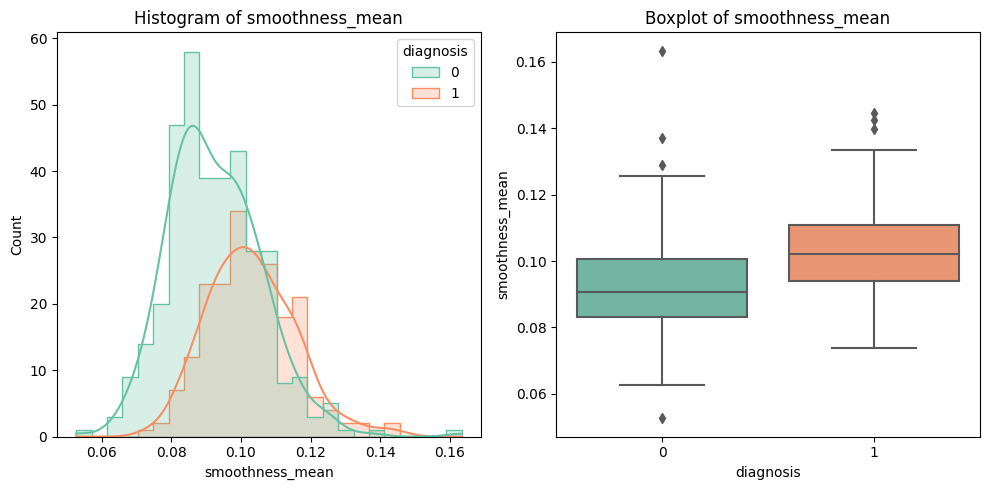

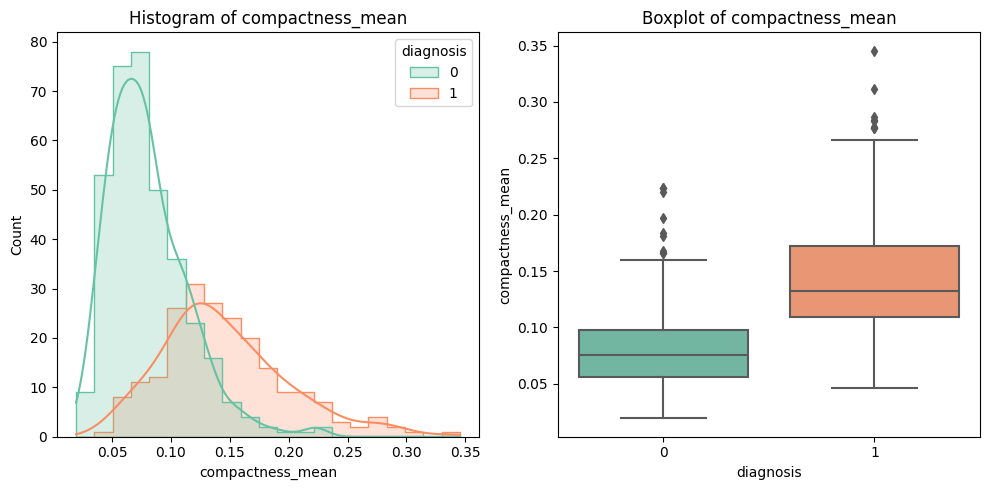

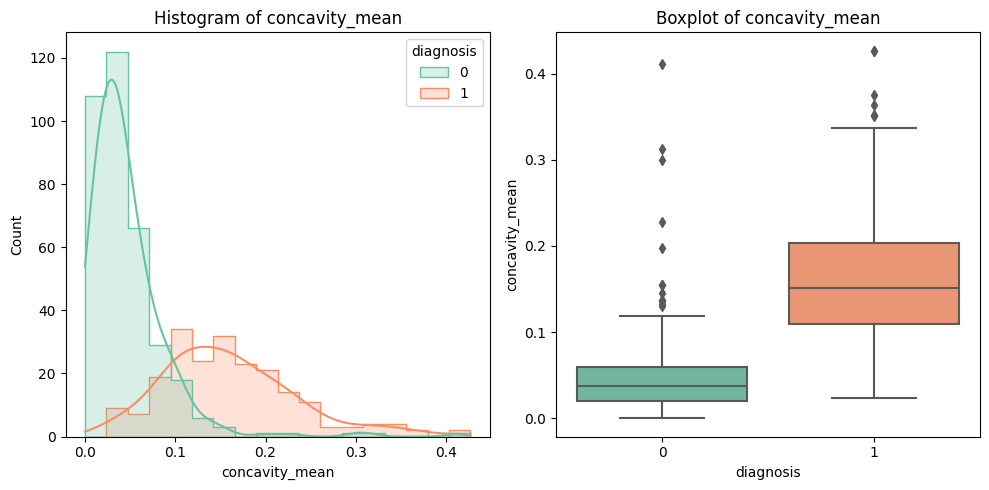

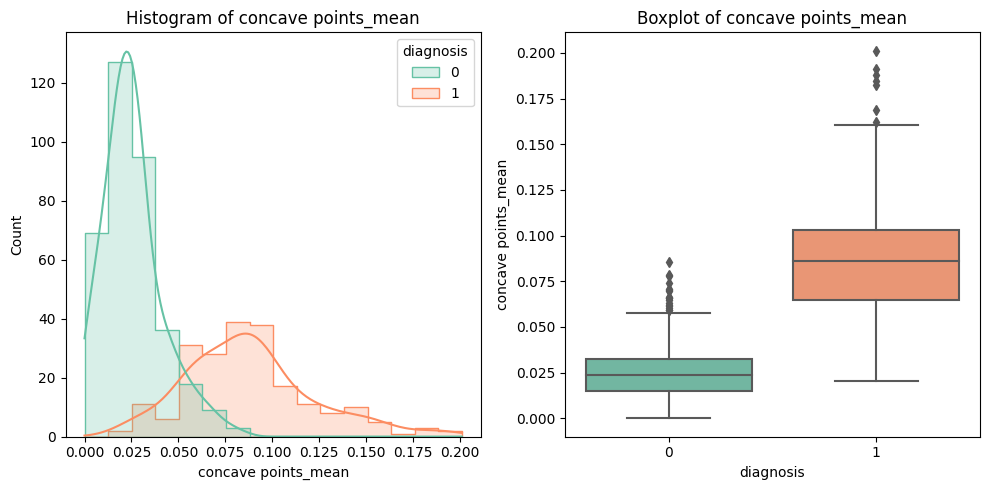

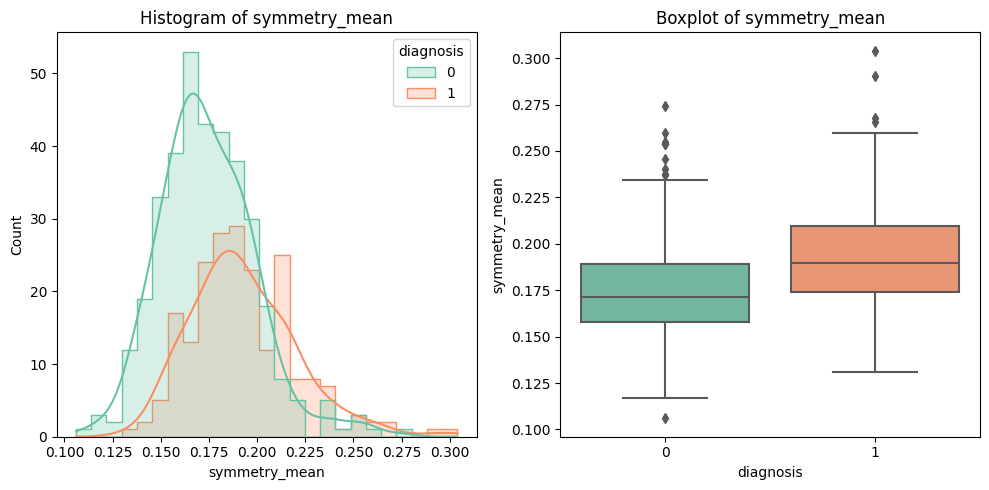

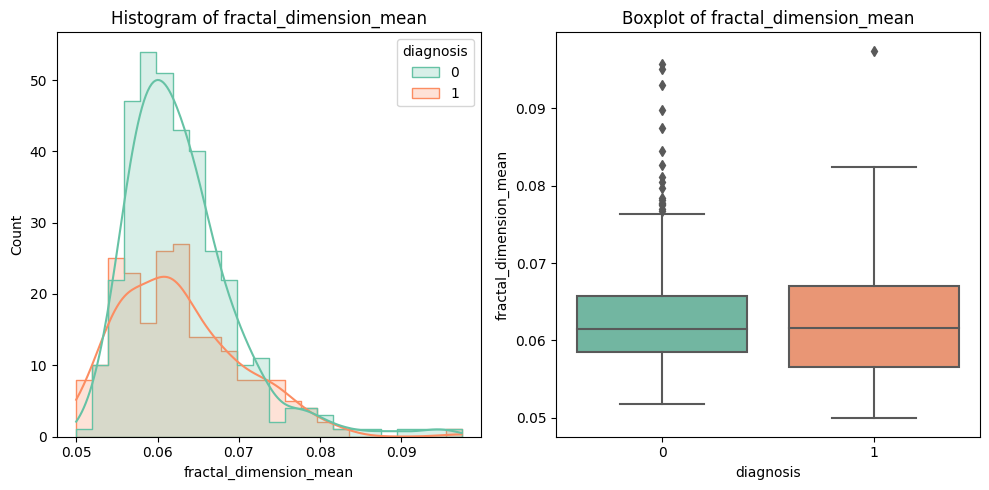

In [ ]:
selected_features = df.columns[1:11]

for feature in selected_features:
    plt.figure(figsize=(10, 5))

    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(data=df, x=feature, hue='diagnosis', element="step", common_norm=False, kde=True, palette='Set2')
    plt.title(f'Histogram of {feature}')

    # Boxplot
    plt.subplot(1, 2, 2)
    sns.boxplot(data=df, x='diagnosis', y=feature, palette='Set2')
    plt.title(f'Boxplot of {feature}')

    plt.tight_layout()
    plt.show()


##Radius Mean:

- Benign (B) Tumors: The histogram shows a right-skewed distribution, indicating that benign tumors tend to have lower mean radius values. This suggests that smaller tumors are more likely to be benign.
- Malignant (m) Tumors: The histogram displays a relatively normal distribution with a peak around a lower radius mean, indicating that malignant tumors are generally larger in size.

##Concave Points Mean:

- Benign (M) Tumors: The histogram demonstrates a right-skewed distribution, implying that benign tumors often have less varied texture mean values. This suggests increased complexity in the texture of malignant tumors.
- Malignant (B) Tumors: The histogram shows a more concentrated distribution around higher mean values, indicating that benign tumors have a more consistent concave points.

##Perimeter Mean:

- Benign (B) Tumors: The histogram is right-skewed, indicating that benign tumors tend to have lower mean perimeter values. This aligns with the observation from the Radius Mean, suggesting irregular and larger-shaped malignant tumors.
- Malignant (M) Tumors: The histogram is relatively normal but broader, indicating that malignant tumors have a higher and more consistent perimeter compared to malignant tumors.

##Area Mean:

- Benign (B) Tumors: The histogram is right-skewed, indicating that benign tumors tend to have lower mean area values. This reiterates the trend observed in Radius Mean and Perimeter Mean, emphasizing the smaller size of benign tumors.
- Malignant (M) Tumors: The histogram shows a relatively normal distribution, centered around higher area mean values than benign, suggesting that malignant tumors are generally larger in size and have more variability in their areas.




---


# **DATA MODELING**

In this section, the features selected for the classification task of predicting tumor malignancy are crucial in capturing the nuances of the underlying data. The following features were chosen based on their known relevance in the domain of oncology and extensive research in the field:

- Concave Points Mean
- Radius Mean
- Perimeter Mean
- Area Mean

**Classifier Selection and Training**

- Decision Tree Classifier: A decision tree model was chosen due to its interpretability and ability to capture non-linear relationships in the data.

- MLP Classifier: A Multi-Layer Perceptron was chosen for its capacity to learn complex patterns in the data.

- Random Forest Classifier: A Random Forest model, an ensemble of decision trees, was selected for its robustness and ability to handle noisy data.


Data Splitting: The dataset was divided into a training set and a testing set. The training set (usually 80% of the data) was used to train the models, and the testing set (remaining 20% of the data) was kept separate to evaluate the models' performance.


In [ ]:
# Import necessary libraries
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import cross_val_score, StratifiedKFold
from imblearn.over_sampling import SMOTE


# Select features and target variable
features = ['radius_mean', 'concave points_mean', 'perimeter_mean', 'area_mean']
X = df[features]
y = df['diagnosis']

# Split the data into training and testing sets with stratification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Apply SMOTE to balance the classes in the training set
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Initialize models
decision_tree = DecisionTreeClassifier(random_state=42)
mlp_classifier = MLPClassifier(random_state=42)
random_forest = RandomForestClassifier(random_state=42)

# Train models
decision_tree.fit(X_resampled, y_resampled)
mlp_classifier.fit(X_resampled, y_resampled)
random_forest.fit(X_resampled, y_resampled)

# Predictions
y_pred_decision_tree = decision_tree.predict(X_test)
y_pred_mlp = mlp_classifier.predict(X_test)
y_pred_random_forest = random_forest.predict(X_test)


Handling Class Imbalance: Due to the imbalanced nature of the dataset with more benign cases than malignant cases, Synthetic Minority Over-sampling Technique (SMOTE) was applied on the training set. SMOTE helps balance the class distribution by creating synthetic samples of the minority class.

**Evaluation Metrics**

**Precision**: Precision is the ratio of correctly predicted positive observations to the total predicted positives. A higher precision indicates fewer false positives.

**Recall**: Recall, or sensitivity, calculates the ratio of correctly predicted positive observations to all the actual positives. Higher recall indicates fewer false negatives.

**F1-Score**: The F1-score is the harmonic mean of precision and recall. It provides a balance between precision and recall. A higher F1-score indicates a better balance between precision and recall.



In [ ]:
# Calculate classification metrics
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree, pos_label=0)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree, pos_label=0)
f1_score_decision_tree = f1_score(y_test, y_pred_decision_tree, pos_label=0)

accuracy_mlp = accuracy_score(y_test, y_pred_mlp)
precision_mlp = precision_score(y_test, y_pred_mlp, pos_label=0)
recall_mlp = recall_score(y_test, y_pred_mlp, pos_label=0)
f1_score_mlp = f1_score(y_test, y_pred_mlp, pos_label=0)

accuracy_random_forest = accuracy_score(y_test, y_pred_random_forest)
precision_random_forest = precision_score(y_test, y_pred_random_forest, pos_label=0)
recall_random_forest = recall_score(y_test, y_pred_random_forest, pos_label=0)
f1_score_random_forest = f1_score(y_test, y_pred_random_forest, pos_label=0)

print("Decision Tree Metrics:")
print(f"Accuracy: {accuracy_decision_tree:.2f}")
print(f"Precision: {precision_decision_tree:.2f}")
print(f"Recall: {recall_decision_tree:.2f}")
print(f"F1 Score: {f1_score_decision_tree:.2f}")

print("\nMLP Metrics:")
print(f"Accuracy: {accuracy_mlp:.2f}")
print(f"Precision: {precision_mlp:.2f}")
print(f"Recall: {recall_mlp:.2f}")
print(f"F1 Score: {f1_score_mlp:.2f}")

print("\nRandom Forest Metrics:")
print(f"Accuracy: {accuracy_random_forest:.2f}")
print(f"Precision: {precision_random_forest:.2f}")
print(f"Recall: {recall_random_forest:.2f}")
print(f"F1 Score: {f1_score_random_forest:.2f}")


Decision Tree Metrics:
Accuracy: 0.89
Precision: 0.94
Recall: 0.89
F1 Score: 0.91

MLP Metrics:
Accuracy: 0.84
Precision: 0.83
Recall: 0.94
F1 Score: 0.88

Random Forest Metrics:
Accuracy: 0.90
Precision: 0.94
Recall: 0.90
F1 Score: 0.92


**Cross Validation**

Stratified k-fold, was utilized to assess model performance comprehensively. Mean accuracy, derived from this method, provided a consolidated view of how well the models generalized across various dataset subsets. Higher mean accuracy scores indicated better overall predictive capability, aiding in reliable model selection.

In [ ]:
# Create a decision tree classifier
classifier = DecisionTreeClassifier(random_state=42)

# Define the cross-validation strategy (Stratified K-Folds for classification tasks)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and print the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("Decision Tree Mean Accuracy:", mean_accuracy)


Accuracy Scores for Each Fold: [0.85087719 0.87719298 0.93859649 0.92105263 0.92982456]
Decision Tree Mean Accuracy: 0.9035087719298245


In [ ]:
# Create an MPL classifier
classifier = MLPClassifier(random_state=42)

# Define the cross-validation strategy (Stratified K-Folds for classification tasks)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores
accuracy_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and print the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("MLP Mean Accuracy:", mean_accuracy)


Accuracy Scores for Each Fold: [0.8245614  0.83333333 0.86842105 0.86842105 0.87719298]
MLP Mean Accuracy: 0.8543859649122807


In [ ]:
# Create a random forest classifier (or any other classifier you want to use)
classifier = RandomForestClassifier(random_state=42)

# Define the cross-validation strategy (Stratified K-Folds for classification tasks)
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Perform cross-validation and get accuracy scores (or other metrics you're interested in)
accuracy_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=cv, scoring='accuracy')

# Print the accuracy scores for each fold
print("Accuracy Scores for Each Fold:", accuracy_scores)

# Calculate and print the mean accuracy score
mean_accuracy = accuracy_scores.mean()
print("Random Forest Mean Accuracy:", mean_accuracy)


Accuracy Scores for Each Fold: [0.87719298 0.87719298 0.95614035 0.93859649 0.96491228]
Random Forest Mean Accuracy: 0.9228070175438596


#EVALUATION

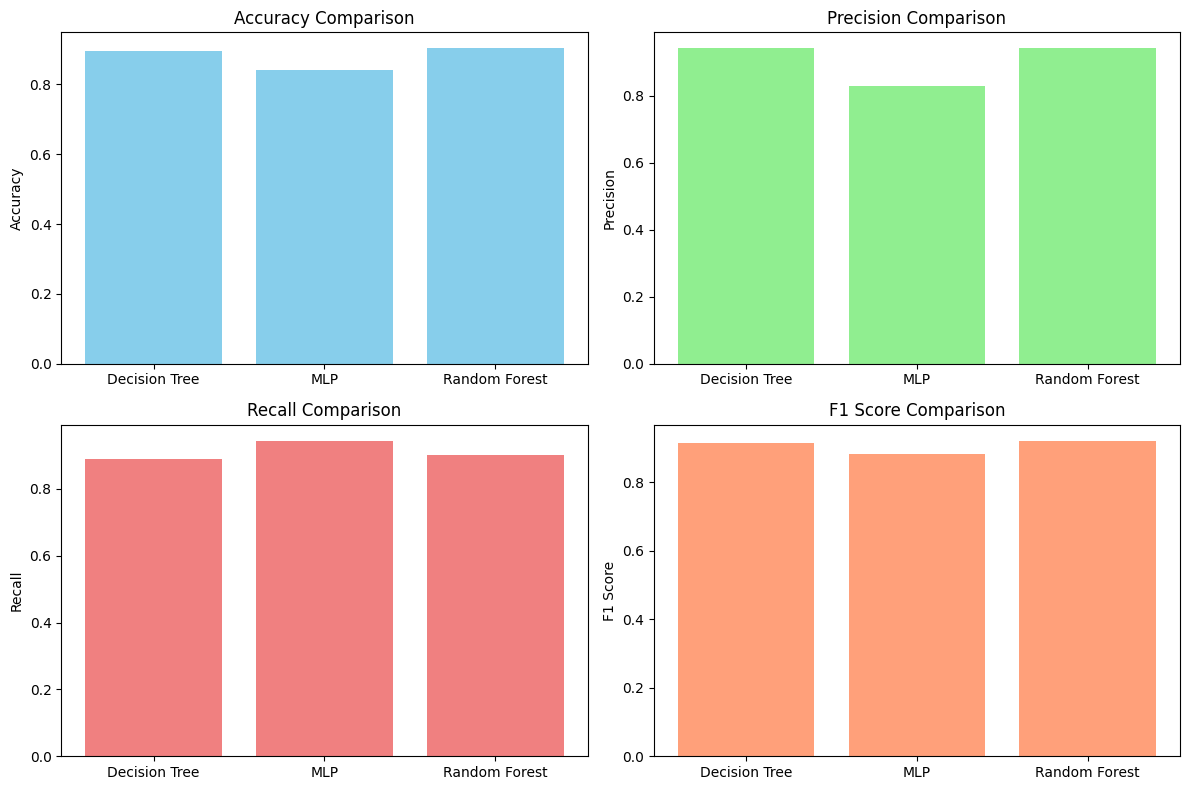

In [ ]:
# Create comparison graphs
models = ['Decision Tree', 'MLP', 'Random Forest']
accuracy_scores = [accuracy_decision_tree, accuracy_mlp, accuracy_random_forest]
precision_scores = [precision_decision_tree, precision_mlp, precision_random_forest]
recall_scores = [recall_decision_tree, recall_mlp, recall_random_forest]
f1_scores = [f1_score_decision_tree, f1_score_mlp, f1_score_random_forest]

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.bar(models, accuracy_scores, color='skyblue')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison')

plt.subplot(2, 2, 2)
plt.bar(models, precision_scores, color='lightgreen')
plt.ylabel('Precision')
plt.title('Precision Comparison')

plt.subplot(2, 2, 3)
plt.bar(models, recall_scores, color='lightcoral')
plt.ylabel('Recall')
plt.title('Recall Comparison')

plt.subplot(2, 2, 4)
plt.bar(models, f1_scores, color='lightsalmon')
plt.ylabel('F1 Score')
plt.title('F1 Score Comparison')

plt.tight_layout()
plt.show()

- **Decision Tree** performed consistently well across all metrics, with a high F1 score and mean accuracy.
- **MLP demonstrated** a balanced performance but with a slightly lower accuracy and F1 score compared to the Decision Tree.
- **Random Forest** outperformed the other models in terms of recall, indicating its ability to identify malignant cases effectively.


In [ ]:

# Calculate the confusion matrix for each model
confusion_matrix_decision_tree = confusion_matrix(y_test, y_pred_decision_tree)
confusion_matrix_mlp = confusion_matrix(y_test, y_pred_mlp)
confusion_matrix_random_forest = confusion_matrix(y_test, y_pred_random_forest)


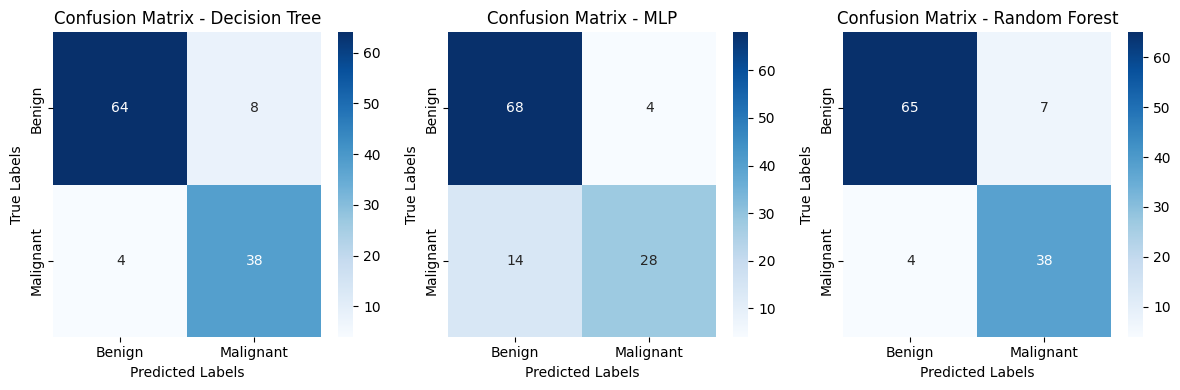

In [ ]:
# Define class labels
class_labels = ['Benign', 'Malignant']

# Plot confusion matrix for Decision Tree
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
sns.heatmap(confusion_matrix_decision_tree, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Decision Tree')

# Plot confusion matrix for MLP
plt.subplot(1, 3, 2)
sns.heatmap(confusion_matrix_mlp, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - MLP')

# Plot confusion matrix for Random Forest
plt.subplot(1, 3, 3)
sns.heatmap(confusion_matrix_random_forest, annot=True, fmt='g', cmap='Blues',
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix - Random Forest')

plt.tight_layout()
plt.show()


**Decision Tree Confusion Matrix:**

- True Positives (TP): 38 - The model correctly predicted 38 malignant cases.
- True Negatives (TN): 64 - The model correctly predicted 64 benign cases.
- False Positives (FP): 8 - The model incorrectly predicted 8 benign cases as malignant.
- False Negatives (FN): 4 - The model incorrectly predicted 4 malignant cases as benign.


**MLP Confusion Matrix:**

- True Positives (TP): 28 - The model correctly predicted 28 malignant cases.
- True Negatives (TN): 68 - The model correctly predicted 68 benign cases.
- False Positives (FP): 4 - The model incorrectly predicted 4 benign cases as malignant.
- False Negatives (FN): 14 - The model incorrectly predicted 14 malignant cases as benign.


**Random Forest Confusion Matrix:**

- True Positives (TP): 38 - The model correctly predicted 38 malignant cases.
- True Negatives (TN): 65 - The model correctly predicted 65 benign cases.
- False Positives (FP): 7 - The model incorrectly predicted 7 benign cases as malignant.
- False Negatives (FN): 4 - The model incorrectly predicted 4 malignant cases as benign.


**CONCLUSION**

**Question 1: Model Accuracy and Reliability**

Machine learning algorithms, specifically Decision Tree, MLP, and Random Forest, were applied to classify breast tumors as malignant or benign. The models demonstrated varying levels of accuracy, precision, recall, and F1 score

Considering the metrics, the Random Forest model stands out as the most reliable for classifying breast tumors due to its balanced accuracy, precision, recall, and F1 score.

**Question 2: Feature Importance and Interpretability**

Analyzing the models, key diagnostic features contributing significantly to accurate classification include radius_mean, concave points_mean, perimeter_mean, and area_mean. These features are crucial in distinguishing between malignant and benign tumors. Understanding the importance of these features is vital for medical professionals, as it provides insights into the specific tumor characteristics influencing the diagnosis.

**Question 3: Generalizability and Real-World Applicability**

The models' ability to identify True Positives and True Negatives showcases their potential in real-world clinical applications. For instance, they can assist medical professionals in confirming malignancy or benignity, thereby guiding treatment decisions. However, it's crucial to note the occurrence of False Positives and False Negatives, which might lead to misdiagnosis. Continuous monitoring and refinement of the models are necessary to enhance their real-world applicability.

Based on the provided metrics and analyses, the Random Forest model appears to be the most suitable for classifying breast tumors as malignant or benign. It consistently demonstrated high accuracy, precision, recall, and F1-score. Additionally, its mean accuracy across cross-validation folds was notably superior, indicating robust performance across different subsets of the data. Random Forest's ability to balance precision, recall, and overall accuracy makes it a strong candidate for  classification task.



**Recommendation:**

**Data Augmentation and Feature Engineering:**

Considering the dropped columns contain various measurements at different scales, explore the possibility of creating new composite features or normalizing the existing ones before dropping them. Feature engineering techniques like combining related features or deriving ratios can sometimes reveal hidden patterns and enhance the model's predictive power. Additionally, consider data augmentation techniques, such as rotation, scaling, or flipping for image data, to artificially increase the dataset's size. Augmented data can enrich the learning process, leading to more robust models.



**References**

**Data Sources:**

[Kaggle Dataset: Breast Cancer Wisconsin (Diagnostic) Data Set](https://www.kaggle.com/datasets/uciml/breast-cancer-wisconsin-data?fbclid=IwAR00bhEtLy0wA1r4H-kpeuHxp98AemR1owSkPtuQKRWQ9g7AaTvGYLj8THs)


**Code Sources:**

[Scikit-Learn Documentation](https://scikit-learn.org/stable/documentation.html)

[Pandas Documentation](https://pandas.pydata.org/pandas-docs/stable/index.html)

[Matplotlib Documentation](https://matplotlib.org/stable/contents.html)

**Literature:**

Breiman, L. (2001). Random forests. Machine learning, 45(1), 5-32.

Chawla, N. V., Bowyer, K. W., Hall, L. O., & Kegelmeyer, W. P. (2002). SMOTE: Synthetic minority over-sampling technique. Journal of artificial intelligence research, 16, 321-357.

Pedregosa, F., Varoquaux, G., Gramfort, A., Michel, V., Thirion, B., Grisel, O., ... & Vanderplas, J. (2011). Scikit-learn: Machine learning in Python. Journal of machine learning research, 12(Oct), 2825-2830.